# Preliminary Analysis and Visualizations

In this project, I perform a segmentation analysis of a store selling various categories of goods using a Kaggle dataset.  Please see below for main objectives and procedure. The main recommendations regarding maximizing revenue and campaign effectiveness depend on the clustering analysis, and are presented at the top of the second notebook (002_Segmentation_and_Takeaways.ipybn)

## Questions to Answer
- Who are the customers that bring the most revenue to the company?
- Who are the customers who *could* bring more revenue to the company?
- To which campaigns do these customers respond?
- Where do different groups of customer shop? (in store, online, over catalog)
- Any additional business insights about the customers?

## Steps
- This notebook (001_Preliminary_Analysis_and_Visualizations.ipynb)
1. Get the data and import the necessary libraries
2. Perform exploratory data analysis, data cleaning, and feature engineering 
- Next notebook (002_Segmentation_and_Takeaways.ipybn)
3. Perform feature scaling and K-Means clustering
4. Analyse the clusters
5. Provide business Recommendations


# Step 1: Get the data and import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data source: 
- https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis or https://www.kaggle.com/datasets/jackdaoud/marketing-data?select=ifood_df.csv
- NOTE: The second link contains the 'Country' column.  It's difficult to interpret what this refers to (customer's country of origin? residence?), but will be useful for cleaning the 'Education' column

## Attributes

### People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- Country: Abbreviated country code
    
### Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
    
### Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
    
### Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### Acknowledgement
- The dataset for this project is provided by Dr. Omar Romero-Hernandez.

In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
df = pd.read_csv('./data/marketing_data.csv')

In [4]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [7]:
df.duplicated().sum() #No duplicate entries

0

# Step 2: Perform exploratory data analysis, data cleaning, and feature engineering 


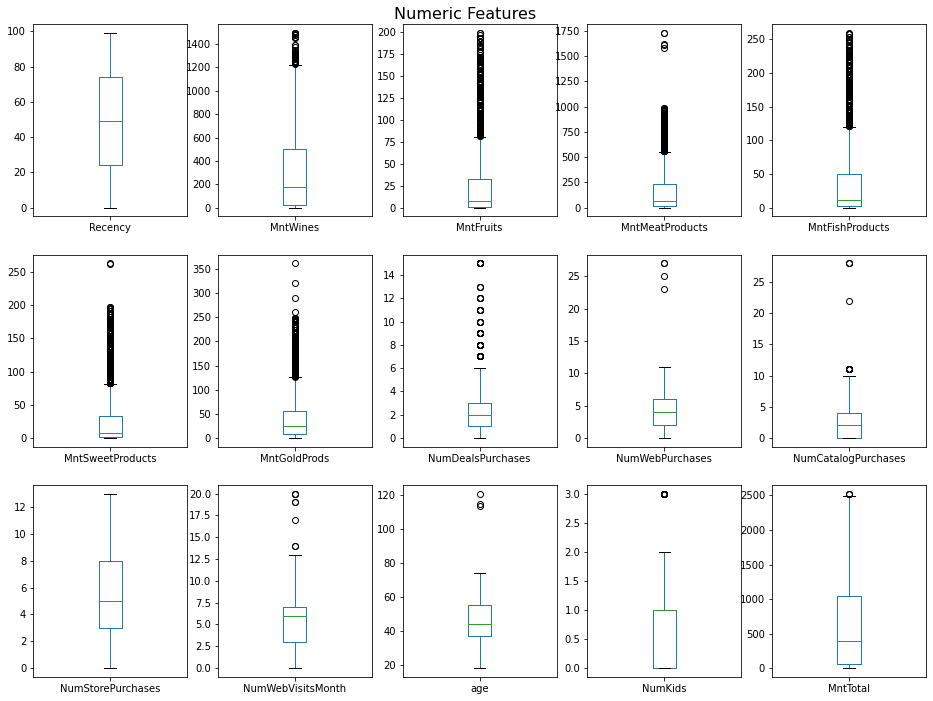

In [8]:
df['age'] = 2014 - df['Year_Birth']
df['NumKids'] = df['Kidhome']+df['Teenhome']
df['MntTotal'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df_ = df.drop(columns=['Year_Birth','Kidhome','Teenhome','ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)
# subplots
df_.plot(subplots=True, layout=(3,5), kind='box', figsize=(16,12))
plt.suptitle('Numeric Features', fontsize=16, y=0.9)
plt.savefig('numeric_boxplots.png')

- There are many reasonable outliers in many categories.  Age outliers appear to be a bit extreme, so will remove these before running KMeans

In [9]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])

df['age'] = 2014 - df['Year_Birth']

- Last customer joined in 2014->Probably implies that our data was gathered up to 2014

In [10]:
df['Dt_Customer'].describe()

count                    2240
unique                    663
top       2012-08-31 00:00:00
freq                       12
first     2012-07-30 00:00:00
last      2014-06-29 00:00:00
Name: Dt_Customer, dtype: object

In [11]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,NumKids,MntTotal
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,1190
1,1,1961,Graduation,Single,"$57,091.00",0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,577
2,10476,1958,Graduation,Married,"$67,267.00",0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,251
3,1386,1967,Graduation,Together,"$32,474.00",1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,11
4,5371,1989,Graduation,Single,"$21,474.00",1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,91
5,7348,1958,PhD,Single,"$71,691.00",0,0,2014-03-17,0,336,130,411,240,32,43,1,4,7,5,2,0,0,0,0,0,1,0,SP,56,0,1192
6,4073,1954,2n Cycle,Married,"$63,564.00",0,0,2014-01-29,0,769,80,252,15,34,65,1,10,10,7,6,1,0,0,0,0,1,0,GER,60,0,1215
7,1991,1967,Graduation,Together,"$44,931.00",0,1,2014-01-18,0,78,0,11,0,0,7,1,2,1,3,5,0,0,0,0,0,0,0,SP,47,1,96
8,4047,1954,PhD,Married,"$65,324.00",0,1,2014-01-11,0,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0,0,0,US,60,1,544
9,9477,1954,PhD,Married,"$65,324.00",0,1,2014-01-11,0,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0,0,0,IND,60,1,544


#### Trying to find the campaign dates based on dates customers joined

In [12]:
group=df.groupby(['AcceptedCmp1','Dt_Customer'])

In [13]:
len(group)

776

In [14]:
group.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])

ID                                           \
                         count    sum   min    max    mean          std   
AcceptedCmp1 Dt_Customer                                                  
0            2012-07-30      1   6653  6653   6653  6653.0          NaN   
             2012-07-31      1   6181  6181   6181  6181.0          NaN   
             2012-08-01      4  24422  2611  10001  6105.5  3183.791712   
             2012-08-02      3  21477  5117   8370  7159.0  1778.601417   
             2012-08-03      5  29356  2223   9847  5871.2  3433.182955   
...                        ...    ...   ...    ...     ...          ...   
1            2014-06-07      1   2225  2225   2225  2225.0          NaN   
             2014-06-10      2   9530  4001   5529  4765.0  1080.459162   
             2014-06-17      1    477   477    477   477.0          NaN   
             2014-06-23      1   2781  2781   2781  2781.0          NaN   
             2014-06-28      1   8093  8093   8093  8093.0          NaN   

                         Year_Birth                                        \
                              count   sum   min   max     mean        std   
AcceptedCmp1 Dt_Customer                                                    
0            2012-07-30           1  1970  1970  1970  1970.00        NaN   
             2012-07-31           1  1950  1950  1950  1950.00        NaN   
             2012-08-01           4  7877  1957  1985  1969.25  13.524669   
             2012-08-02           3  5886  1947  1976  1962.00  14.525839   
             2012-08-03           5  9786  1955  1965  1957.20   4.381780   
...                             ...   ...   ...   ...      ...        ...   
1            2014-06-07           1  1977  1977  1977  1977.00        NaN   
             2014-06-10           2  3892  1946  1946  1946.00   0.000000   
             2014-06-17           1  1986  1986  1986  1986.00        NaN   
             2014-06-23           1  1981  1981  1981  1981.00        NaN   
             2014-06-28           1  1969  1969  1969  1969.00        NaN   

                         Kidhome                           Teenhome          \
                           count sum min max mean      std    count sum min   
AcceptedCmp1 Dt_Customer                                                      
0            2012-07-30        1   1   1   1  1.0      NaN        1   1   1   
             2012-07-31        1   0   0   0  0.0      NaN        1   0   0   
             2012-08-01        4   2   0   1  0.5  0.57735        4   1   0   
             2012-08-02        3   0   0   0  0.0  0.00000        3   1   0   
             2012-08-03        5   0   0   0  0.0  0.00000        5   5   1   
...                          ...  ..  ..  ..  ...      ...      ...  ..  ..   
1            2014-06-07        1   0   0   0  0.0      NaN        1   0   0   
             2014-06-10        2   4   2   2  2.0  0.00000        2   2   1   
             2014-06-17        1   0   0   0  0.0      NaN        1   0   0   
             2014-06-23        1   0   0   0  0.0      NaN        1   0   0   
             2014-06-28        1   0   0   0  0.0      NaN        1   0   0   

                                                Recency  ...  Response  \
                         max      mean      std   count  ...       std   
AcceptedCmp1 Dt_Customer                                 ...             
0            2012-07-30    1  1.000000      NaN       1  ...       NaN   
             2012-07-31    0  0.000000      NaN       1  ...       NaN   
             2012-08-01    1  0.250000  0.50000       4  ...  0.577350   
             2012-08-02    1  0.333333  0.57735       3  ...  0.000000   
             2012-08-03    1  1.000000  0.00000       5  ...  0.447214   
...                       ..       ...      ...     ...  ...       ...   
1            2014-06-07    0  0.000000      NaN       1  ...       NaN   
             2014-06-10    1  1.000000  0.00000    

In [18]:
group1=df.groupby(['AcceptedCmp1'])
group1.agg({'Dt_Customer':['count', 'min', 'max']})

Dt_Customer                      
                   count        min        max
AcceptedCmp1                                  
0                   2096 2012-07-30 2014-06-29
1                    144 2012-08-18 2014-06-28

In [19]:
group2=df.groupby(['AcceptedCmp2'])
group2.agg({'Dt_Customer':['count', 'min', 'max']})

Dt_Customer                      
                   count        min        max
AcceptedCmp2                                  
0                   2210 2012-07-30 2014-06-29
1                     30 2012-08-18 2014-06-17

In [20]:
group3=df.groupby(['AcceptedCmp3'])
group3.agg({'Dt_Customer':['count', 'min', 'max']})

Dt_Customer                      
                   count        min        max
AcceptedCmp3                                  
0                   2077 2012-07-30 2014-06-29
1                    163 2012-08-01 2014-06-26

In [21]:
group4=df.groupby(['AcceptedCmp4'])
group4.agg({'Dt_Customer':['count', 'min', 'max']})

Dt_Customer                      
                   count        min        max
AcceptedCmp4                                  
0                   2073 2012-07-30 2014-06-29
1                    167 2012-08-04 2014-06-29

In [22]:
group5=df.groupby(['AcceptedCmp5'])
group5.agg({'Dt_Customer':['count', 'min', 'max']})

Dt_Customer                      
                   count        min        max
AcceptedCmp5                                  
0                   2077 2012-07-30 2014-06-29
1                    163 2012-08-01 2014-06-23

In [23]:
groupR=df.groupby(['Response','Dt_Customer'])
groupR.agg({'Dt_Customer':['count', 'min', 'max']})#.sort_values('Dt_Customer')

Dt_Customer                      
                           count        min        max
Response Dt_Customer                                  
0        2012-07-31            1 2012-07-31 2012-07-31
         2012-08-01            2 2012-08-01 2012-08-01
         2012-08-02            3 2012-08-02 2012-08-02
         2012-08-03            4 2012-08-03 2012-08-03
         2012-08-04            3 2012-08-04 2012-08-04
...                          ...        ...        ...
1        2014-06-07            1 2014-06-07 2014-06-07
         2014-06-15            1 2014-06-15 2014-06-15
         2014-06-16            1 2014-06-16 2014-06-16
         2014-06-17            1 2014-06-17 2014-06-17
         2014-06-23            1 2014-06-23 2014-06-23

[886 rows x 3 columns]

In [24]:
groupR=df.groupby(['Response'])
groupR.agg({'Dt_Customer':['count', 'min', 'max']})#.sort_values('Dt_Customer')

Dt_Customer                      
               count        min        max
Response                                  
0               1906 2012-07-31 2014-06-29
1                334 2012-07-30 2014-06-23

- Campaigns appear to have been ongoing

In [25]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'age', 'NumKids',
       'MntTotal'],
      dtype='object')

In [26]:
df['Income']=df[' Income ']

df['Income']=df.Income.str.replace('$','')

df['Income']=df.Income.str.replace(',','')#.astype("Int64")

df['Income']=df.Income.astype("float")
df = df.drop([' Income '], axis=1)

In [27]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'age', 'NumKids',
       'MntTotal', 'Income'],
      dtype='object')

In [28]:
type(df['Income'][1])

numpy.float64

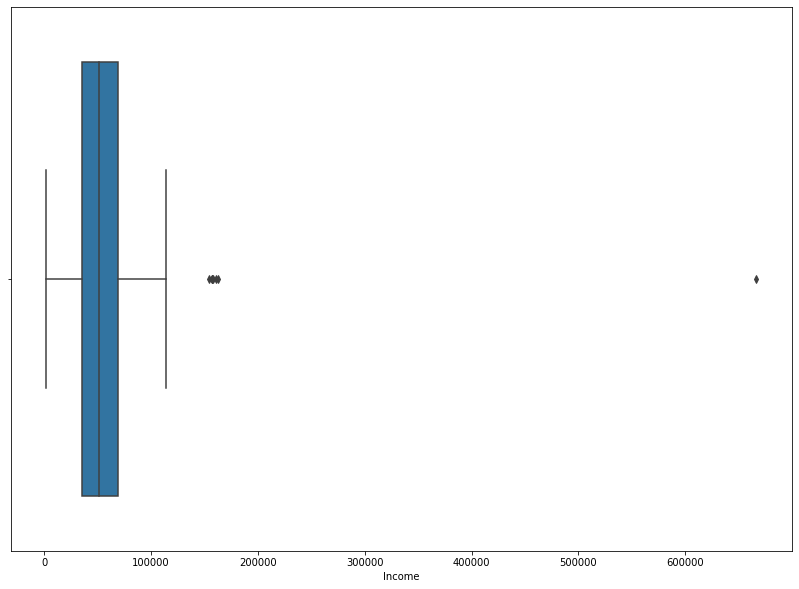

In [29]:
plt.figure(figsize=(14,10))

ax=sns.boxplot(x = 'Income', data = df)

- One extreme income outlier to drop before KMeans (the person also does not spend a lot, so probably not a key customer)

<AxesSubplot:xlabel='Income', ylabel='Density'>

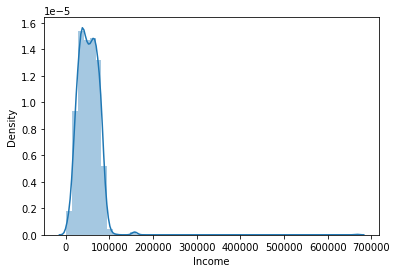

In [30]:
sns.distplot(df['Income'])


In [36]:
df[df.Income.isnull()]

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,NumKids,MntTotal,Income
134,8996,1957,PhD,Married,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0,GER,57,3,603,NaN
262,1994,1983,Graduation,Married,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,US,31,1,19,NaN
394,3769,1972,PhD,Together,1,0,2014-03-02,17,25,1,13,0,0,3,1,1,0,3,7,0,0,0,0,0,0,0,AUS,42,1,42,NaN
449,5255,1986,Graduation,Single,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0,AUS,28,1,637,NaN
525,8268,1961,PhD,Married,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0,CA,53,1,404,NaN
590,10629,1973,2n Cycle,Married,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0,GER,41,1,109,NaN
899,10475,1970,Master,Together,0,1,2013-04-01,39,187,5,65,26,20,14,2,4,2,6,5,0,0,0,0,0,0,0,US,44,1,317,NaN
997,9235,1957,Graduation,Single,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0,GER,57,2,18,NaN
1096,4345,1964,2n Cycle,Single,1,1,2014-01-12,49,5,1,9,2,0,4,1,1,0,2,7,0,0,0,0,0,0,0,AUS,50,2,21,NaN
1185,7187,1969,Master,Together,1,1,2013-05-18,52,375,42,48,94,66,96,7,4,10,4,3,0,0,0,0,0,0,0,AUS,45,2,721,NaN


- For now, fill the missing values with the median income.  It's only one percent of the obsrevations, but might be worth trying a different solution later. For example, flag these missing values, find median income by education, then fill in with that.  Jeremy Howard finds that median often works well enough, but may try this for experience.  Also read PSI's Kaggle blog on extracting lots of information from just one feature for the Titanic. 

In [37]:
df['Income'].fillna((df['Income'].median()), inplace=True)

In [38]:
df[df.Income.isnull()]

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,NumKids,MntTotal,Income


In [39]:
df['LogIncome'] = np.log1p(df['Income'])

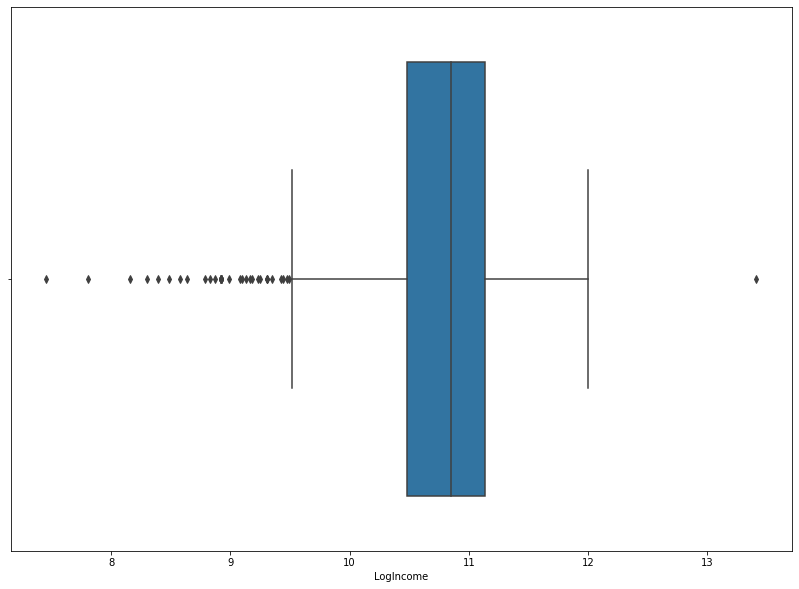

In [40]:
plt.figure(figsize=(14,10))

ax=sns.boxplot(x = 'LogIncome', data = df)

- Use 'Country' column to infer the meaning of 2n Cycle (probably Master's degree according to some web education-related sources such as https://www.unibo.it/en/teaching/enrolment-transfer-and-final-examination/the-university-system, but some arguments have been made on Kaggle for it being a Bachelor's)

In [48]:
df.Education.value_counts()

Bachelor    1127
Master       573
PhD          486
Basic         54
Name: Education, dtype: int64

In [49]:
df.groupby(['Education','Country'])['Education'].value_counts()

Education  Country  Education
Bachelor   AUS      Bachelor      85
           CA       Bachelor     133
           GER      Bachelor      59
           IND      Bachelor      76
           ME       Bachelor       1
           SA       Bachelor     161
           SP       Bachelor     548
           US       Bachelor      64
Basic      AUS      Basic          4
           CA       Basic          7
           GER      Basic          2
           IND      Basic          4
           SA       Basic          6
           SP       Basic         28
           US       Basic          3
Master     AUS      Master        41
           CA       Master        73
           GER      Master        40
           IND      Master        42
           ME       Master         1
           SA       Master        85
           SP       Master       268
           US       Master        23
PhD        AUS      PhD           30
           CA       PhD           55
           GER      PhD           19
        

- Following https://www.kaggle.com/datasets/jackdaoud/marketing-data/discussion/208329, 
2nd cycle is Master's and Graduation is Bachelor's

In [50]:
df['Education'].unique()

array(['Bachelor', 'PhD', 'Master', 'Basic'], dtype=object)

In [51]:
df.Education

0       Bachelor
1       Bachelor
2       Bachelor
3       Bachelor
4       Bachelor
          ...   
2235         PhD
2236      Master
2237    Bachelor
2238    Bachelor
2239         PhD
Name: Education, Length: 2240, dtype: object

In [52]:
df.loc[df['Education']=='2n Cycle','Education']='Master'

df.loc[df['Education']=='Graduation','Education']='Bachelor'

In [53]:
df.groupby(['Country','Education']).Education.value_counts()

Country  Education  Education
AUS      Bachelor   Bachelor      85
         Basic      Basic          4
         Master     Master        41
         PhD        PhD           30
CA       Bachelor   Bachelor     133
         Basic      Basic          7
         Master     Master        73
         PhD        PhD           55
GER      Bachelor   Bachelor      59
         Basic      Basic          2
         Master     Master        40
         PhD        PhD           19
IND      Bachelor   Bachelor      76
         Basic      Basic          4
         Master     Master        42
         PhD        PhD           26
ME       Bachelor   Bachelor       1
         Master     Master         1
         PhD        PhD            1
SA       Bachelor   Bachelor     161
         Basic      Basic          6
         Master     Master        85
         PhD        PhD           85
SP       Bachelor   Bachelor     548
         Basic      Basic         28
         Master     Master       268
        

In [54]:
df.Education.value_counts()

Bachelor    1127
Master       573
PhD          486
Basic         54
Name: Education, dtype: int64

<AxesSubplot:>

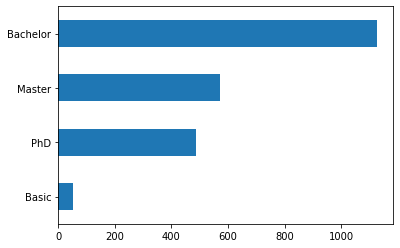

In [55]:
df.Education.value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

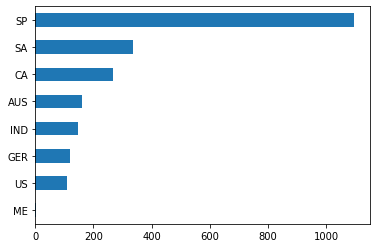

In [56]:
df.Country.value_counts().sort_values().plot(kind = 'barh')

In [57]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [58]:
df['Kidhome'].value_counts()

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

In [59]:
df['Teenhome'].value_counts()

0    1158
1    1030
2      52
Name: Teenhome, dtype: int64

#### Engineer 'NumChildren' and 'HasPartner' features for future analysis

In [62]:
df['NumChildren']  = df['Kidhome']+df['Teenhome']
df['HasChildren']=np.where(df.NumChildren> 0, 1, 0)
df['HasChildren'].value_counts()

1    1602
0     638
Name: HasChildren, dtype: int64

In [233]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [64]:
df['HasPartner']=np.where(((df.Marital_Status== 'Married')|(df.Marital_Status== 'Together')), 1, 0)
df['HasPartner'].value_counts()

1    1444
0     796
Name: HasPartner, dtype: int64

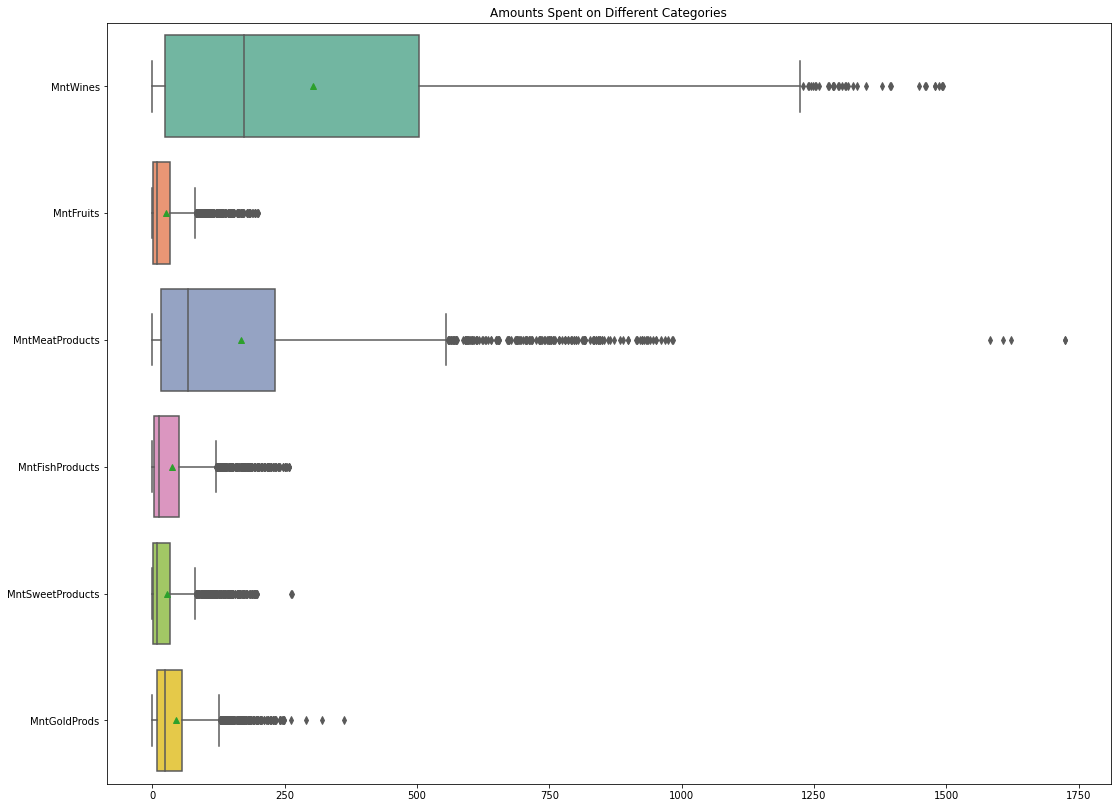

In [67]:
plt.figure(figsize=(18,14))
#for feature in ['MntTotal','MntWines']:
ax = sns.boxplot(data=df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']], orient="h", palette="Set2",
                showmeans=True)
plt.title("Amounts Spent on Different Categories") 
plt.savefig('./figures/amounts_spent.png')

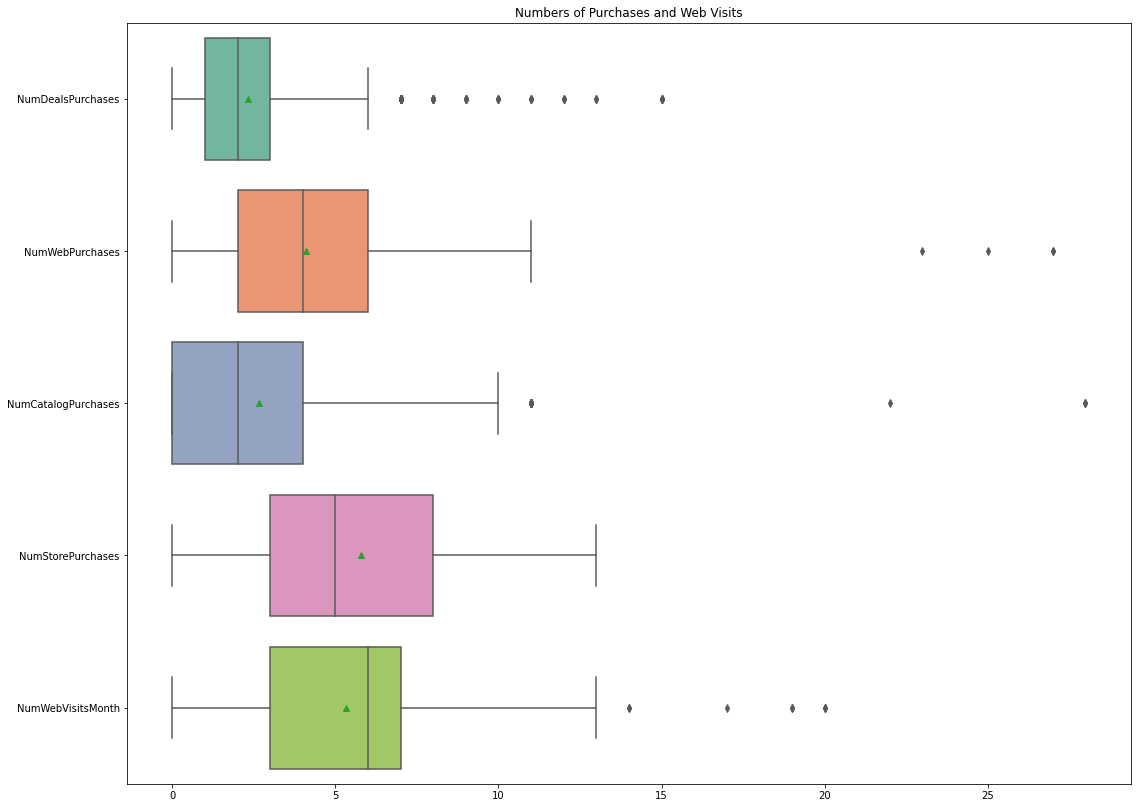

In [68]:
plt.figure(figsize=(18,14))
#for feature in ['MntTotal','MntWines']:
ax = sns.boxplot(data=df[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']], orient="h", palette="Set2",showmeans=True)
plt.title("Numbers of Purchases and Web Visits") 
plt.savefig('./figures/num_deals.png')

#### Look at the correlation matrix to get an idea of the linear relationship between different variables

<AxesSubplot:>

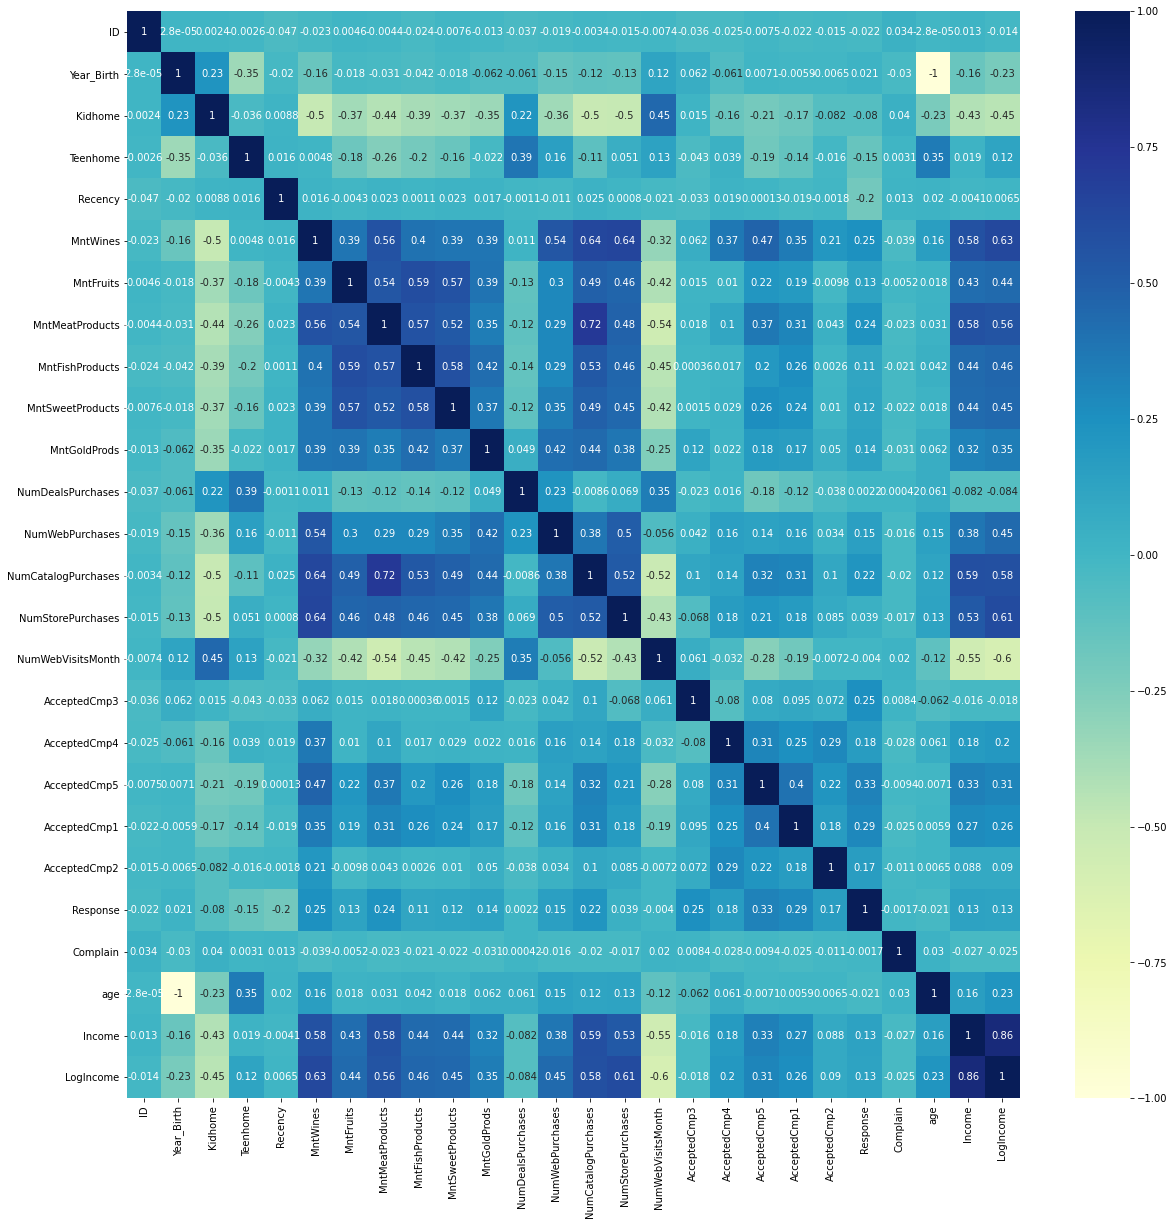

In [41]:
corrs= df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrs,annot=True, cmap="YlGnBu", center=0)

- Response (accepting last campaign) is most highly correlated with accepting the last campaign (not surprising), followed by camapaign 1, then amount spent on wine/campaign 3, then amount spent on meats

- Appears that customers that accept other campaigns and spend more on wine and meat are the likeliest to respond to the last campaign.  Who are these customers?

#### Add a column to model total amounts

In [69]:
df['MntTotal'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

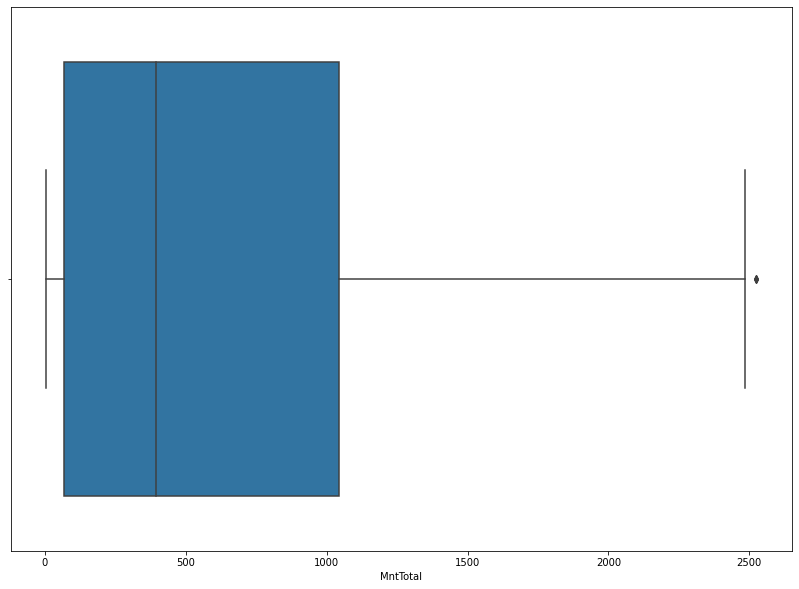

In [70]:
plt.figure(figsize=(14,10))

ax=sns.boxplot(x = 'MntTotal', data = df)

In [71]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'age', 'NumKids',
       'MntTotal', 'Income', 'LogIncome', 'NumChildren', 'HasChildren',
       'HasPartner'],
      dtype='object')

In [72]:
#Add a column to model total number of purchases
df['NumTotalPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases']+df['NumCatalogPurchases']+\
    df['NumStorePurchases']+df['NumWebVisitsMonth']


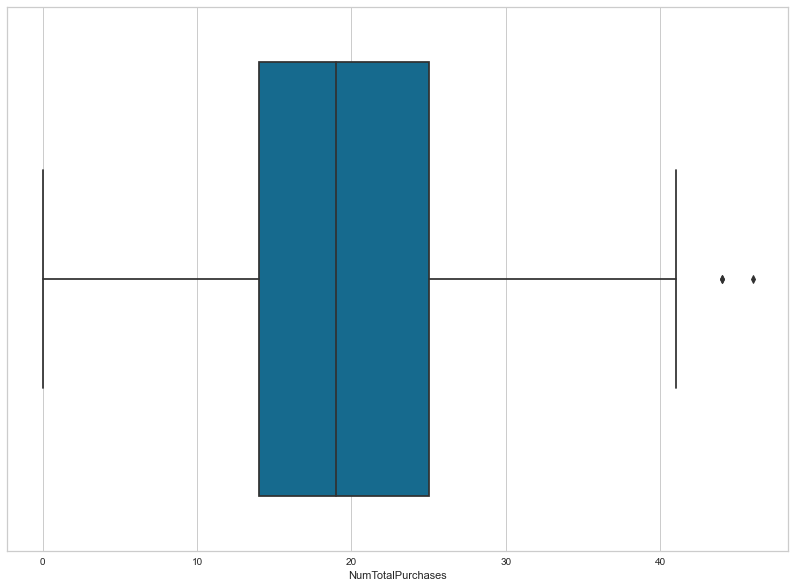

In [136]:
plt.figure(figsize=(14,10))

ax=sns.boxplot(x = 'NumTotalPurchases', data = df)

In [137]:
df['AcceptedCmpTot']=df['AcceptedCmp1']+ df['AcceptedCmp2']+ df['AcceptedCmp3']+ df['AcceptedCmp4']+\
       + df['AcceptedCmp5'] #+ df['Response']
# df=df.drop(['AcceptedCmp1_5'], axis=1)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,AcceptedCmpTot,Len_Customer,MntTotal,NumTotalPurchases
0,1826,1970,2,2,"$84,835.00",0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,110 days,1190,16
1,1,1961,2,4,"$57,091.00",0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,1,111 days,577,23
2,10476,1958,2,3,"$67,267.00",0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,0,144 days,251,13
3,1386,1967,2,5,"$32,474.00",1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,0,146 days,11,11
4,5371,1989,2,4,"$21,474.00",1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,179 days,91,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,4,2,"$66,476.00",0,1,2013-03-07,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US,38,0,576 days,689,24
2236,5263,1977,0,3,"$31,056.00",1,0,2013-01-22,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP,37,0,620 days,55,13
2237,22,1976,2,2,"$46,310.00",1,0,2012-12-03,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP,38,0,670 days,309,22
2238,528,1978,2,3,"$65,819.00",0,0,2012-11-29,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND,36,0,674 days,1383,23


### Add a column to model total accepted campaigns

Text(0.5, 1.0, 'Marketing Campaign Acceptance Rates')

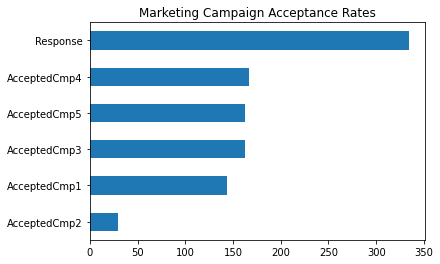

In [73]:
#df[["AcceptedCmp1", "AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1_5","Response","NumDealsPurchases"]].sum().sort_values().plot.barh()
df[["AcceptedCmp1", "AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum().sort_values().plot.barh()

plt.title("Marketing Campaign Acceptance Rates") # Get rates!  Are these offerred to all 2240 customers?

### Identify the first and last possible dates data could have been collected

<AxesSubplot:xlabel='Dt_Customer', ylabel='Count'>

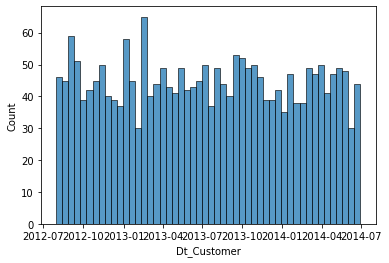

In [78]:
sns.histplot(data=df.Dt_Customer, bins=50)

In [79]:
df_ =df.set_index(['Dt_Customer'])

In [80]:
df_.head()

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,NumKids,MntTotal,Income,LogIncome,NumChildren,HasChildren,HasPartner,NumTotalPurchases
Dt_Customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-06-16,1826,1970,Bachelor,Divorced,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,1190,84835.0,11.348475,0,0,0,16
2014-06-15,1,1961,Bachelor,Single,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,577,57091.0,10.952419,0,0,0,23
2014-05-13,10476,1958,Bachelor,Married,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,251,67267.0,11.116440,1,1,1,13
2014-05-11,1386,1967,Bachelor,Together,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,11,32474.0,10.388226,2,1,1,11
2014-04-08,5371,1989,Bachelor,Single,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,91,21474.0,9.974645,1,1,0,15


In [81]:
df_.loc['2014-05-16' : '2014-06-29' ]

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,NumKids,MntTotal,Income,LogIncome,NumChildren,HasChildren,HasPartner,NumTotalPurchases
Dt_Customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-06-16,1826,1970,Bachelor,Divorced,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,1190,84835.0,11.348475,0,0,0,16
2014-06-15,1,1961,Bachelor,Single,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,577,57091.0,10.952419,0,0,0,23
2014-06-29,453,1956,PhD,Widow,1,1,1,27,0,12,0,1,5,2,2,0,3,5,0,0,0,0,0,0,0,SP,58,2,45,35340.0,10.472799,2,1,0,12
2014-05-31,9687,1975,Bachelor,Single,0,0,1,184,174,256,50,30,32,1,5,4,6,2,0,0,0,0,0,0,0,CA,39,0,726,73170.0,11.200554,0,0,0,18
2014-05-30,8890,1971,PhD,Divorced,1,1,1,155,7,80,13,7,10,3,5,1,5,6,0,0,0,0,0,0,0,SP,43,2,272,65808.0,11.094512,2,1,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-28,213,1963,PhD,Single,1,1,98,35,0,11,0,0,2,4,2,1,3,7,0,0,0,0,0,0,0,SP,51,2,48,23091.0,10.047242,2,1,0,17
2014-06-27,2831,1976,Bachelor,Together,0,1,99,453,38,279,188,38,183,2,7,7,10,3,0,0,0,0,0,0,0,SP,38,1,1179,78416.0,11.269796,1,1,1,29
2014-06-08,868,1966,Bachelor,Married,0,1,99,54,0,7,0,0,4,1,2,0,3,6,0,0,0,0,0,0,0,SA,48,1,65,44794.0,10.709852,1,1,1,12


In [82]:
df_.loc['2014-06-29' :  ] 
# There have been 50 days since the last purchase of customer who joined on 2014-06-29, so the data
# had to go through at least 2014-08-18

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,NumKids,MntTotal,Income,LogIncome,NumChildren,HasChildren,HasPartner,NumTotalPurchases
Dt_Customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-06-29,453,1956,PhD,Widow,1,1,1,27,0,12,0,1,5,2,2,0,3,5,0,0,0,0,0,0,0,SP,58,2,45,35340.0,10.472799,2,1,0,12
2014-06-29,7300,1952,Bachelor,Divorced,0,1,50,448,4,34,6,4,39,3,8,1,7,5,0,1,0,0,0,0,0,IND,62,1,535,69142.0,11.143932,1,1,0,24


### Finding the latest date of the available data: Timestamp('2014-10-04 00:00:00')

In [33]:
latest_date=(df["Dt_Customer"] + pd.to_timedelta(df['Recency'],'d')).max()
print(latest_date)

earliest_date=(df["Dt_Customer"]).min()
print(earliest_date)

2014-10-04 00:00:00
2012-07-30 00:00:00


#### Eventually want the amount spent by customer/ length they've been a customer, etc.  First, figure out how long they've been a customer



In [34]:
df['Len_Customer']=latest_date - df["Dt_Customer"]

df['Len_Customer']=df['Len_Customer'] / pd.to_timedelta(1, unit='D') #Convert to float

In [37]:
df_.loc['2014-05-16' : '2014-06-29' ]

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,NumKids,MntTotal


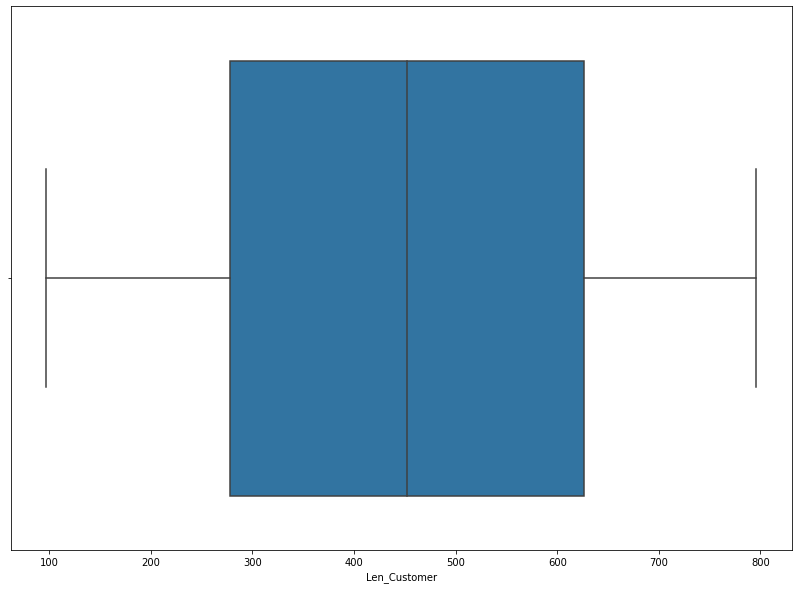

In [38]:
plt.figure(figsize=(14,10))

ax=sns.boxplot(x = 'Len_Customer', data = df)

- There were 796 days between earliest and latest dates. Not sure why there were not customers who joined at the very end.

In [39]:
df.Len_Customer.min()

97.0

<AxesSubplot:xlabel='Len_Customer', ylabel='Count'>

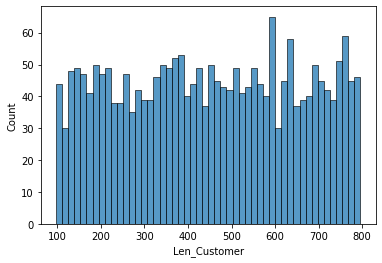

In [40]:
sns.histplot(data=df.Len_Customer, bins=50)

In [41]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,NumKids,MntTotal,Income,Len_Customer
0,1826,1970,Graduation,Divorced,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,1190,84835.0,110.0
1,1,1961,Graduation,Single,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,577,57091.0,111.0
2,10476,1958,Graduation,Married,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,251,67267.0,144.0
3,1386,1967,Graduation,Together,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,11,32474.0,146.0
4,5371,1989,Graduation,Single,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,91,21474.0,179.0


### Add normalized amount spent, a key feature

In [44]:
#df.drop(['MntSpentByLenCustomer'],axis=1)
df['MntSpentNorm']=df['MntTotal']/df['Len_Customer']

<AxesSubplot:xlabel='MntSpentNorm', ylabel='Count'>

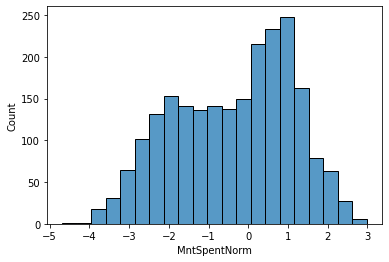

In [45]:
sns.histplot(np.log(df['MntSpentNorm'])) #Normalized amount spent
# I believe the negatives make sense since if we divide amount spend by a larger length customer 
# (eg, $100/200 days as customer), we'll have a number < 1=>Customer's hwo spend less than $1/day 
# will be mapped to the left of 0